In [32]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [34]:
path=datasets.download_data(MNIST_URL,ext='.gz');path

PosixPath('/home/jupyter/.fastai/data/mnist.pkl.gz')

In [35]:
with gzip.open(path,'rb') as f:
    ((x_train,y_train),(x_valid,y_valid),_)=pickle.load(f,encoding='latin-1')

In [36]:
x_train.shape

(50000, 784)

In [37]:
y_train.shape

(50000,)

In [38]:
#convert numpy array to tensor
x_train,y_train,x_valid,y_valid=map(tensor,(x_train,y_train,x_valid,y_valid))

In [39]:
x_train.type()

'torch.FloatTensor'

In [40]:
x_train.shape

torch.Size([50000, 784])

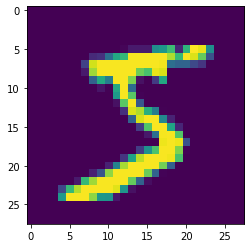

In [41]:
img=x_train[0]
plt.imshow(img.view(28,28))

In [42]:
y_train[0]

tensor(5)

In [68]:
def matmul(a,b):
    ar,ac=a.shape
    br,bc=b.shape
    assert ac==br
    c=torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j]+=a[i,k]*b[k,j]
    return c

In [45]:
weights=torch.randn(784,10) #because it will x(50000,784)*weights(784*10)
bias = torch.zeros(10)

In [55]:
m1=x_valid[:5]
m2=weights

In [56]:
m1.shape

torch.Size([5, 784])

In [57]:
m2.shape

torch.Size([784, 10])

In [70]:
def matmul(a,b):
    ar,ac=a.shape
    br,bc=b.shape
    assert ac==br
    c=torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
                c[i,j]=(a[i,:]*b[:,j]).sum()
    return c

In [71]:
%time t1=matmul(m1,m2)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 12.2 ms


In [81]:
m=tensor([[10.,11.,12.],
          [13.,14.,15.],
          [16.,17.,18.]
         ])

In [82]:
m

tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

In [83]:
c= tensor([10.,20.,30.])

In [84]:
c+m

tensor([[20., 31., 42.],
        [23., 34., 45.],
        [26., 37., 48.]])

In [85]:
m+c

tensor([[20., 31., 42.],
        [23., 34., 45.],
        [26., 37., 48.]])

In [88]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [101]:
m

tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

In [103]:
m[0].unsqueeze(-1)

tensor([[10.],
        [11.],
        [12.]])

In [126]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i]   = (a[i].unsqueeze(-1) * b).sum(dim=0)
    return c

In [127]:
%timeit -n 10  t1=matmul(m1,m2)

275 µs ± 20 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [128]:
#einsum
def matmul(a,b): return torch.einsum('ik,kj->ij',a,b)

In [129]:
%timeit -n 10 t1=matmul(m1,m2)

54.1 µs ± 6.64 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [130]:
%timeit -n 10 t1=m1.matmul(m2) #pytorch matmul

The slowest run took 11.82 times longer than the fastest. This could mean that an intermediate result is being cached.
17.5 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [131]:
%timeit -n 10 t1=m1@m2

The slowest run took 5.35 times longer than the fastest. This could mean that an intermediate result is being cached.
13.1 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [138]:

!python notebook2script.py Lesson8-MatMul.ipynb

Converted Lesson8-MatMul.ipynb to exp/nb_Lesson8-MatMul.py
